# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: CodeChallenge: more qwerties!
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

##### This is an integration of 2 notebooks: ```03-DUDL_ANN...``` and ```06-DUDL_ANN...```
##### Essentially we are practicing important coding skills
##### Make three groups of qwerties and train a 3-output ANN (using a 2-4-3 layer architecture) to classify them

In [13]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

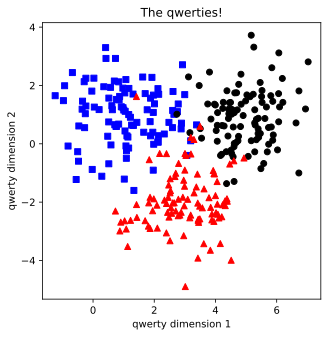

In [14]:
# create data

nPerClust = 100
blur = 1

# Make sure center coordinates of each group is far away from each other
# Such that the 3 groups are separable
A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Create the ANN model

In [15]:
# model architecture
ANNq = nn.Sequential(
    nn.Linear(2,4),    # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(4,3),    # output units
    nn.Softmax(dim=1), # final activation unit (see Additional Exploration #2 for a discussion about this)
      )

# loss function
# This makes your output gets softmax-ized twice
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNq.parameters(),lr=.01)

In [16]:
# test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)
yHat

torch.Size([300, 2])
torch.Size([300, 3])


tensor([[0.3307, 0.3249, 0.3444],
        [0.4477, 0.3051, 0.2471],
        [0.3552, 0.3098, 0.3350],
        [0.2903, 0.3050, 0.4047],
        [0.3880, 0.3212, 0.2908],
        [0.2954, 0.3173, 0.3873],
        [0.3623, 0.3109, 0.3268],
        [0.3273, 0.3278, 0.3449],
        [0.2903, 0.3050, 0.4047],
        [0.3793, 0.3082, 0.3125],
        [0.2903, 0.3050, 0.4047],
        [0.3111, 0.3116, 0.3773],
        [0.2903, 0.3050, 0.4047],
        [0.3689, 0.3215, 0.3097],
        [0.3688, 0.3200, 0.3112],
        [0.4478, 0.3112, 0.2409],
        [0.4670, 0.3084, 0.2245],
        [0.3891, 0.3211, 0.2898],
        [0.3028, 0.3182, 0.3790],
        [0.3038, 0.3026, 0.3936],
        [0.3270, 0.3089, 0.3641],
        [0.3534, 0.3124, 0.3341],
        [0.3035, 0.3101, 0.3864],
        [0.2956, 0.3034, 0.4010],
        [0.2903, 0.3050, 0.4047],
        [0.3987, 0.3177, 0.2835],
        [0.3405, 0.3207, 0.3388],
        [0.2903, 0.3050, 0.4047],
        [0.3017, 0.3268, 0.3715],
        [0.314

# Train the model

In [21]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNq(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  ongoingAcc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANNq(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

predictions

tensor([[9.9010e-01, 9.8746e-03, 2.2865e-05],
        [1.6852e-01, 7.8565e-04, 8.3069e-01],
        [9.5752e-01, 7.0794e-04, 4.1769e-02],
        [9.6444e-01, 6.8199e-03, 2.8736e-02],
        [8.8374e-01, 2.9195e-02, 8.7063e-02],
        [9.9131e-01, 8.6843e-03, 7.8764e-06],
        [9.3521e-01, 8.2884e-04, 6.3960e-02],
        [9.9090e-01, 9.0994e-03, 1.2886e-06],
        [9.9177e-01, 8.1252e-03, 1.0345e-04],
        [9.1659e-01, 2.0236e-04, 8.3212e-02],
        [9.9181e-01, 7.9509e-03, 2.3831e-04],
        [9.9481e-01, 4.8792e-03, 3.1338e-04],
        [9.6770e-01, 5.6594e-03, 2.6639e-02],
        [8.2604e-01, 1.7388e-01, 7.7551e-05],
        [8.6990e-01, 1.2952e-01, 5.8054e-04],
        [2.7073e-01, 5.9031e-01, 1.3896e-01],
        [8.1119e-02, 1.4623e-01, 7.7265e-01],
        [8.7664e-01, 3.0478e-02, 9.2881e-02],
        [9.9141e-01, 8.5722e-03, 1.3028e-05],
        [9.9325e-01, 3.5400e-03, 3.2054e-03],
        [9.9340e-01, 1.9052e-03, 4.6915e-03],
        [9.2973e-01, 3.8595e-04, 6

# Visualize the results

Final accuracy: 94.3333%


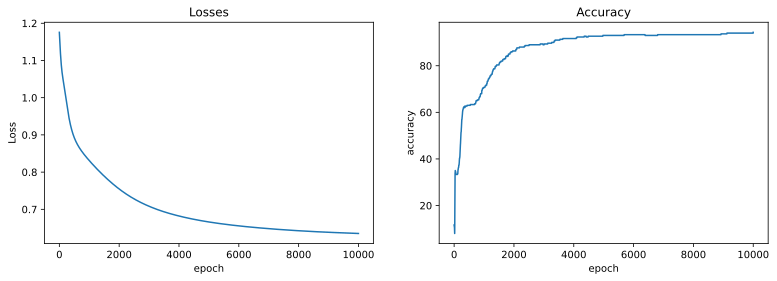

In [19]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [20]:
# confirm that all model predictions sum to 1
torch.sum(yHat,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [ ]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = [  'bs','ko','r^' ]
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 2'],loc=(1.01,.4))
plt.show()

# Additional explorations

In [ ]:
# 1) Does the model always do well? Re-run the entire notebook multiple times and see if it always reaches high accuracy
#    (e.g., >90%). What do you think would be ways to improve the performance stability of the model?
# 
# 2) You'll learn in the section "Metaparameters" that CrossEntropyLoss computes log-softmax internally. Does that mean 
#    that the Softmax() layer in the model needs to be there? Does it hurt or help? If you remove that final layer, what
#    would change and what would be the same in the rest of the notebook?
#    (Note about this problem: If it feels too advanced, then revisit this problem after the "Metaparameters" section.)
# 